<a href="https://colab.research.google.com/github/celiosantana/KmeansCluster_HealthRisk/blob/main/Classifica%C3%A7%C3%A3o_Kmeans_An%C3%A1lise_de_Pacientes_Coron%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clusteriação Utilizando o K-Means

Para tal será analisada a base de dados de Flores Iris que contem 4 características de flores utilizado pelo estatístico e biólogo Ronald Fisher em 1936 no paper The use of multiple measurements in taxonomic problems. Os dados foram uitlizados para fazer uma análise de dados multi-variados.

##Importando as Bibliotecas



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
import numpy as np
from sklearn.cluster import KMeans

##Verificando as versões das bibliotecas usadas

In [2]:
import sklearn as sk
import plotly as ptl

print(f''' Verificando versões das Bibliotecas: \n 
pandas: {pd.__version__}
numpy: {np.__version__}
sklearn: {sk.__version__}
plotly: {ptl.__version__}
''')

 Verificando versões das Bibliotecas: 
 
pandas: 1.5.3
numpy: 1.22.4
sklearn: 1.2.2
plotly: 5.13.1



## Coleta de Dados

In [4]:
#Por ter dados em português o código é o latin-1
estados = pd.read_csv('/content/unidades_federativas_do_Brasil.csv', sep=';',  encoding = 'latin-1')
dadosMedicos = pd.read_csv('/content/dados_medicos.csv', sep=';',  encoding = 'latin-1')
dadosPerfil = pd.read_excel('/content/dados_perfil.xlsx')


## Analisando os dados

In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível 

In [6]:
dadosMedicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               989 non-null    float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [7]:
dadosPerfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Gênero             1000 non-null   object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  1000 non-null   object 
 4   Atividade Física   1000 non-null   object 
 5   cod_uf             1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
estados.describe()

,ID,Idade,cod_uf
count,1000.000000,990.000000,1000.000000
mean,500.500000,48.887879,29.289000
std,288.819436,17.940937,13.041993
min,1.000000,18.000000,11.000000
25%,250.750000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,750.250000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


In [8]:
dadosMedicos.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [9]:
dadosPerfil.describe()

,ID,Idade,cod_uf
count,1000.000000,990.000000,1000.000000
mean,500.500000,48.887879,29.289000
std,288.819436,17.940937,13.041993
min,1.000000,18.000000,11.000000
25%,250.750000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,750.250000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


In [ ]:
dadosPerfil.isna().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

In [10]:
dadosMedicos.isna().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

In [11]:
estados.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

## Visualizando Dados Ausentes

In [13]:
dadosMedicos.loc[dadosMedicos['Colesterol Total'].isnull()] 

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
42,43,26.7,165,66,Normal,177.2,NaN,141.9,Não
48,49,24.4,141,68,Normal,113.8,NaN,175.8,Sim
218,219,33.5,142,69,Normal,150.9,NaN,168.3,Não
401,402,31.0,142,90,Alto,104.4,NaN,120.0,Não
565,566,20.6,155,87,Normal,129.9,NaN,155.6,Sim
629,630,28.7,92,86,Normal,143.6,NaN,110.7,Não
710,711,33.6,92,100,Alto,171.9,NaN,119.1,Não
720,721,27.4,112,88,Normal,143.0,NaN,148.1,Não
737,738,33.2,140,61,Normal,133.8,NaN,86.0,Não
839,840,36.1,116,83,Normal,134.2,NaN,160.4,Não


In [14]:
dadosPerfil.loc[dadosPerfil['Idade'].isnull()]

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
92,93,F,NaN,Baixo,Atividade Moderada,33
162,163,M,NaN,Baixo,Sedentário,41
163,164,F,NaN,Baixo,Ativo,28
164,165,F,NaN,Baixo,Atividade Moderada,41
205,206,M,NaN,Baixo,Ativo,12
833,834,M,NaN,Moderado,Ativo,53
841,842,F,NaN,Alto,Atividade Moderada,43
894,895,F,NaN,Moderado,Atividade Moderada,43
971,972,M,NaN,Alto,Atividade Moderada,53
995,996,F,NaN,Moderado,Sedentário,23


## Tratamento de Dados

In [22]:
#Retirando os 9 registros sem idade nos dados do perfil
dadosPerfil.dropna(subset='Idade', inplace=True)

In [23]:
#Verificando os registros
dadosPerfil.count()

ID                   990
Gênero               990
Idade                990
Consumo de Álcool    990
Atividade Física     990
cod_uf               990
dtype: int64

In [24]:
#Inserindo a média do colesterol onde estiver vazio
mediaColesterol = dadosMedicos['Colesterol Total'].mean()
mediaColesterol = round(mediaColesterol,2)
dadosMedicos['Colesterol Total'].fillna(mediaColesterol, inplace=True)

In [25]:
#Verificando os Registros
dadosMedicos.count()

ID                               1000
IMC                              1000
Pressão Sistólica                1000
Pressão Diastólica               1000
Nível de Açúcar                  1000
peso                             1000
Colesterol Total                 1000
Triglicerídeos                   1000
Histórico Familiar - Cardiaco    1000
dtype: int64

##Vizualização dos Dados

<Axes: title={'center': 'Histograma das Idades'}, xlabel='Idade', ylabel='Count'>

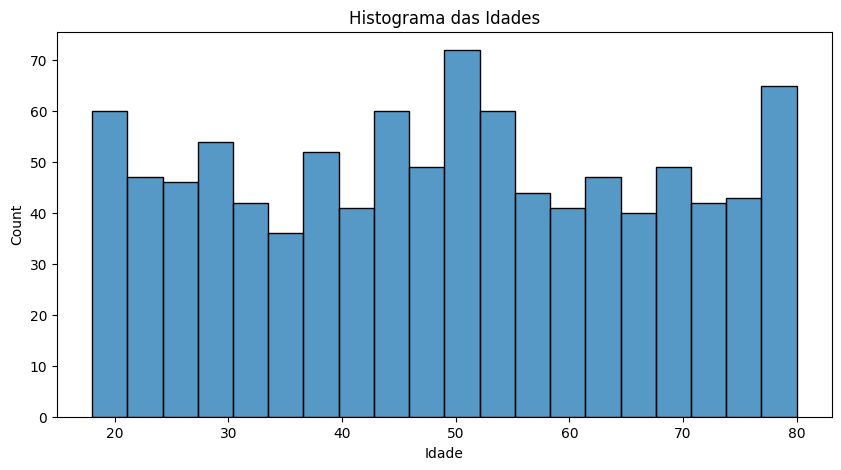

In [29]:
#Criando um Histograma agrupando as idades dos dados do perfil
plt.figure(figsize=(10,5))
plt.title('Histograma das Idades')
sns.histplot(dadosPerfil.Idade, bins=20) #20 Barras

<Axes: title={'center': 'Histograma do Colesterol'}, xlabel='Colesterol Total', ylabel='Count'>

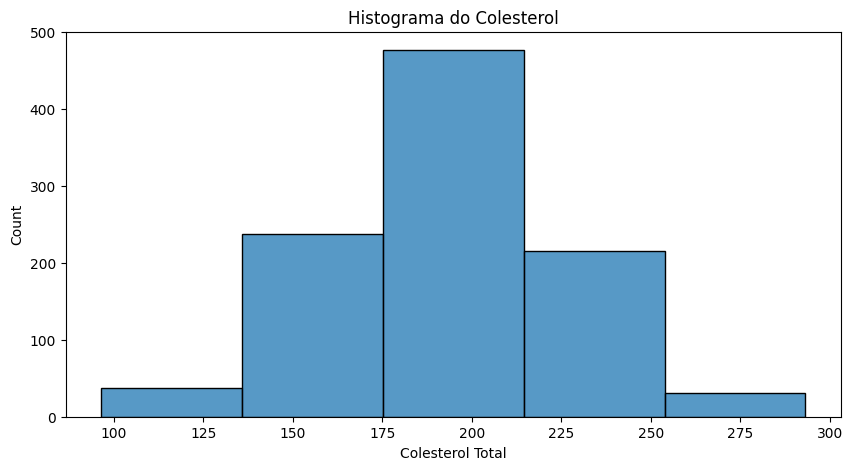

In [28]:
plt.figure(figsize=(10,5))
plt.title('Histograma do Colesterol')
sns.histplot(dadosMedicos['Colesterol Total'], bins=5) #5 Barras

## Criando Gráficos de BoxPlot

<Axes: title={'center': 'BoxPlot da Idade'}, xlabel='Idade'>

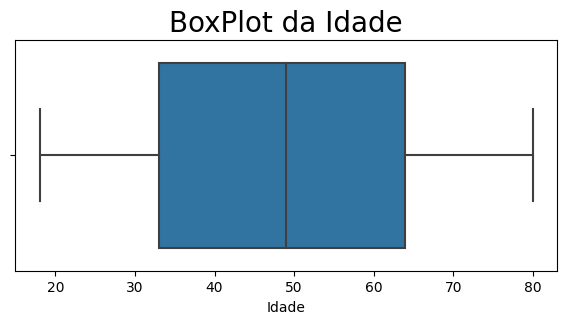

In [31]:
#Gráfico de BoxPlot
#Aqui ainda não estamos considerando outliers

plt.figure(figsize=(7,3))
plt.title('BoxPlot da Idade', size=20)
sns.boxplot(x='Idade', data=dadosPerfil, orient='h')

<Axes: title={'center': 'BoxPlot do Colesterol'}, xlabel='Colesterol Total'>

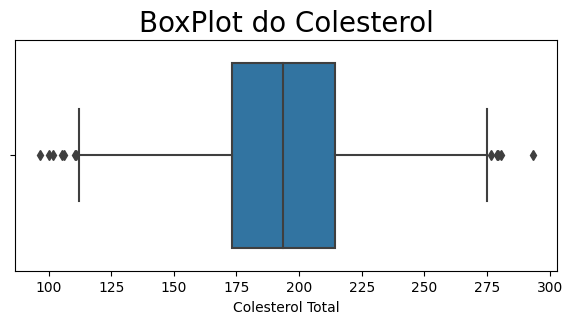

In [34]:
# Aqui temos alguns outliers, mas não faremos nada com eles.

plt.figure(figsize=(7,3))
plt.title('BoxPlot do Colesterol', size=20)
sns.boxplot(x='Colesterol Total', data=dadosMedicos, orient='h')

##Criando os dados de Correlação

<Axes: title={'center': 'Correlação entre Colesterol e Triglicerídeo'}>

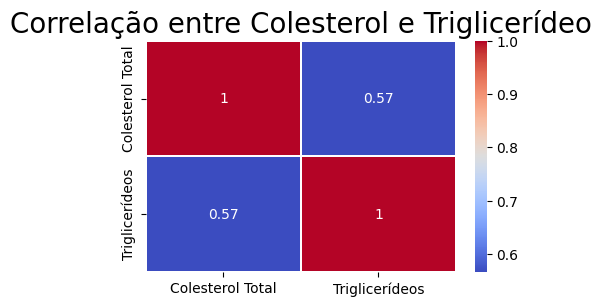

In [36]:
#Correlação entre Colesterol e Triglicerídeos

plt.figure(figsize=(5,3))
plt.title('Correlação entre Colesterol e Triglicerídeo', size=20)
dadosCorrelacao = dadosMedicos[['Colesterol Total','Triglicerídeos']]
sns.heatmap(dadosCorrelacao.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

<Axes: title={'center': 'Correlação entre Colesterol e Peso'}>

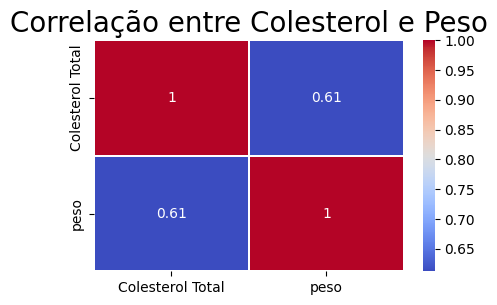

In [37]:
#Correlação entre Colesterol e Peso

plt.figure(figsize=(5,3))
plt.title('Correlação entre Colesterol e Peso', size=20)
dadosCorrelacao = dadosMedicos[['Colesterol Total','peso']] #Reutilizando a Variável
sns.heatmap(dadosCorrelacao.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

<Axes: title={'center': 'Correlação entre IMC e Pressão Diastólica'}>

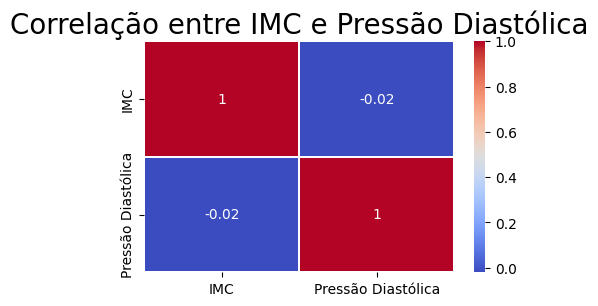

In [ ]:
#Correlação entre IMC e Pressão Diastólica

plt.figure(figsize=(5,3))
plt.title('Correlação entre IMC e Pressão Diastólica', size=20)
dadosCorrelacao = dadosMedicos[['IMC','Pressão Diastólica']] #Reutilizando a variável
sns.heatmap(dadosCorrelacao.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

## Criando um único dataframe com todos os dados juntados




In [57]:
'''Vamos precisar transformar os dados criando colunas nos datasframes com o mesmo
nome, para isso vamos usar o LabelEncoder para gerar as novas colunas com códigos
númericos para fazer o 'join'
'''
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

#criando a coluna UF nos dados de perfil
dadosPerfil['UF'] = LE.fit_transform(dadosPerfil['cod_uf'])

#renomeando a coluna cod_uf para codigo uf nos dados de perfil
dadosPerfil.rename(columns={'cod_uf':'codigo_uf'}, inplace=True)

#Criando o ultimo dataframe com o merge dos 3 outros datasets
dadosPerfilCompleto = pd.merge(dadosPerfil, dadosMedicos, on='ID') #Merge com os dados medicos
dadosPerfilCompleto = pd.merge(dadosPerfilCompleto, estados, on='codigo_uf') #Merge com os estados

#Resetando a ordenação
dadosPerfilCompleto.reset_index(drop=True, inplace=True)

#Verificando o novo dataFrame
dadosPerfilCompleto



,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,codigo_uf,UF,IMC,Pressão Sistólica,Pressão Diastólica,...,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,uf,nome,latitude,longitude,regiao,pais
0,1,M,74.0,Moderado,Atividade Moderada,31,16,31.7,139,70,...,162.1,262.8,152.6,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
1,6,F,78.0,Moderado,Atividade Moderada,31,16,24.2,165,81,...,148.6,183.3,154.3,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
2,65,M,41.0,Moderado,Atividade Moderada,31,16,35.2,109,61,...,173.3,165.2,73.5,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
3,97,M,58.0,Baixo,Atividade Moderada,31,16,25.3,170,95,...,153.6,141.7,140.5,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
4,98,F,22.0,Moderado,Atividade Moderada,31,16,20.8,148,65,...,129.0,150.1,156.9,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,870,F,26.0,Baixo,Sedentário,52,25,32.3,112,92,...,159.2,201.5,133.5,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil
986,905,F,18.0,Baixo,Sedentário,52,25,32.7,140,82,...,135.9,166.1,151.1,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil
987,907,M,58.0,Moderado,Atividade Moderada,52,25,32.8,107,82,...,124.1,206.5,113.5,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil
988,940,F,30.0,Moderado,Atividade Moderada,52,25,28.0,155,63,...,170.3,202.6,160.2,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil


##Organizando o DataFrame

In [59]:
#Organizando o primeiro DataFrame (view) com peso e triglicerídeo

ordemColuna = ['peso','Triglicerídeos']
dadosTrabalhados = dadosPerfilCompleto[ordemColuna]
dadosTrabalhados

,peso,Triglicerídeos
0,162.1,152.6
1,148.6,154.3
2,173.3,73.5
3,153.6,140.5
4,129.0,156.9
...,...,...
985,159.2,133.5
986,135.9,151.1
987,124.1,113.5
988,170.3,160.2


##Calculando o WCSS

In [66]:
#Criando uma função para calcular o WCSS
def calcularWCSS(dadosCliente):
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(X=dadosCliente)
    wcss.append(kmeans.inertia_)
  return wcss


In [ ]:
#Criando as variáveis de trigliciredíos e peso
dadosTrabalhados = dadosPerfilCompleto[['peso','Triglicerídeos']]

In [67]:
#Calculando o WCSS dos clientes
wcssPacientes = calcularWCSS(dadosTrabalhados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [68]:
#Visualizando os resultados
for i in range(len(wcssPacientes)):
  print('Cluster', i, 'Valor do WCSS: ', wcssPacientes[i])

Cluster 0 Valor do WCSS:  2015696.2225858571
Cluster 1 Valor do WCSS:  1111177.27275397
Cluster 2 Valor do WCSS:  836803.9221592899
Cluster 3 Valor do WCSS:  620727.9449389006
Cluster 4 Valor do WCSS:  515606.8475207895
Cluster 5 Valor do WCSS:  435227.42716824857
Cluster 6 Valor do WCSS:  385266.0760619425
Cluster 7 Valor do WCSS:  345221.108775205
Cluster 8 Valor do WCSS:  309256.4440449179
Cluster 9 Valor do WCSS:  275406.31509892107


In [69]:
#Criando o Grráfico de Cotovelo
graficoCotoveloPacientes = px.line(x=range(1,11),y=wcssPacientes)
graficoCotoveloPacientes.update_xaxes(title_text = 'Numero de Clusters')
graficoCotoveloPacientes.update_yaxes(title_text = 'valor do WCSS')
graficoCotoveloPacientes.update_layout(title_text = 'Gráfico de cotovelo do Cluster', title_x =0.5)
graficoCotoveloPacientes.update_layout(template = 'plotly_white')
graficoCotoveloPacientes.show() #Pelo gráfico o WCSS indica que o ideal é criar 3 clusters

##Criando os Agrupamentos dos Pacientes

In [65]:
#Gerando o Kmeans para este conjunto de dados
kmeansPacientes = KMeans(n_clusters=3, random_state=0)

#Inserindo a Coluna Cluster no dataFrame geral 
dadosPerfilCompleto['Cluster'] = kmeansPacientes.fit_predict(dadosTrabalhados)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,codigo_uf,UF,IMC,Pressão Sistólica,Pressão Diastólica,...,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,uf,nome,latitude,longitude,regiao,pais,Cluster
0,1,M,74.0,Moderado,Atividade Moderada,31,16,31.7,139,70,...,262.8,152.6,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
1,6,F,78.0,Moderado,Atividade Moderada,31,16,24.2,165,81,...,183.3,154.3,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
2,65,M,41.0,Moderado,Atividade Moderada,31,16,35.2,109,61,...,165.2,73.5,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,1
3,97,M,58.0,Baixo,Atividade Moderada,31,16,25.3,170,95,...,141.7,140.5,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
4,98,F,22.0,Moderado,Atividade Moderada,31,16,20.8,148,65,...,150.1,156.9,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,870,F,26.0,Baixo,Sedentário,52,25,32.3,112,92,...,201.5,133.5,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0
986,905,F,18.0,Baixo,Sedentário,52,25,32.7,140,82,...,166.1,151.1,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0
987,907,M,58.0,Moderado,Atividade Moderada,52,25,32.8,107,82,...,206.5,113.5,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,1
988,940,F,30.0,Moderado,Atividade Moderada,52,25,28.0,155,63,...,202.6,160.2,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0


##Calculando o Centroide dos Clusters

In [ ]:
centroidesPacientes = kmeansPacientes.cluster_centers_

graficoPacientes = px.scatter(x = dadosPerfilCompleto['peso'], y= dadosPerfilCompleto['Triglicerídeos'], color = dadosPerfilCompleto['Cluster'])
graficoCentroidePacientes = px.scatter(x = centroidesPacientes[:,0], y = centroidesPacientes[:,1], size=[7,7,7])
graficoFinal = go.Figure(data = graficoPacientes.data + graficoCentroidePacientes.data)
graficoFinal.update_xaxes(title_text = 'Peso')
graficoFinal.update_yaxes(title_text = 'Triglicerídeos')
graficoFinal.update_layout(title_text = 'Clusters', title_x =0.5)
graficoFinal.show()

## Verificando o Numero de pessoas em cada grupo



In [91]:
#Criando DataFrame Temporário Cluster Pacientes
clusterPacientes = dadosPerfilCompleto

#Renomeando os clusters
clusterPacientes.loc[clusterPacientes['Cluster']==1, 'nome_cluster'] = 'Risco Moderado'
clusterPacientes.loc[clusterPacientes['Cluster']==0, 'nome_cluster'] ='Risco Alto'
clusterPacientes.loc[clusterPacientes['Cluster']==2, 'nome_cluster'] ='Risco Muito Alto'

#Verificando a variável colesterol separada por grupos
clusterPacientes .groupby('nome_cluster')['Colesterol Total'].describe()


,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,codigo_uf,UF,IMC,Pressão Sistólica,Pressão Diastólica,...,Triglicerídeos,Histórico Familiar - Cardiaco,uf,nome,latitude,longitude,regiao,pais,Cluster,nome_cluster
250,445,F,32.0,Moderado,Atividade Moderada,53,26,37.8,139,79,...,49.2,Não,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,1,Risco Moderado
385,524,F,32.0,Moderado,Ativo,51,24,39.6,95,89,...,49.5,Não,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste,Brasil,1,Risco Moderado
870,628,F,21.0,Moderado,Sedentário,42,21,36.7,94,96,...,54.4,Sim,SC,Santa Catarina,-27.45,-50.95,Sul,Brasil,1,Risco Moderado
630,903,M,45.0,Moderado,Atividade Moderada,50,23,18.0,91,92,...,54.5,Não,MS,Mato Grosso do Sul,-20.51,-54.54,Centro-Oeste,Brasil,1,Risco Moderado
407,999,M,57.0,Baixo,Atividade Moderada,51,24,30.4,141,77,...,54.6,Sim,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste,Brasil,1,Risco Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,53,F,51.0,Baixo,Atividade Moderada,42,21,28.5,154,99,...,242.1,Sim,SC,Santa Catarina,-27.45,-50.95,Sul,Brasil,2,Risco Muito Alto
47,42,M,57.0,Moderado,Sedentário,35,19,26.7,158,100,...,244.1,Não,SP,São Paulo,-22.19,-48.79,Sudeste,Brasil,2,Risco Muito Alto
244,276,F,70.0,Moderado,Sedentário,53,26,27.0,131,63,...,249.3,Não,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil,2,Risco Muito Alto
88,231,M,32.0,Baixo,Atividade Moderada,29,15,28.2,155,70,...,252.6,Não,BA,Bahia,-13.29,-41.71,Nordeste,Brasil,2,Risco Muito Alto


## Gráficos BoxPlot


<Axes: title={'center': 'Gráfico de BoxPlot'}, xlabel='Triglicerídeos', ylabel='nome_cluster'>

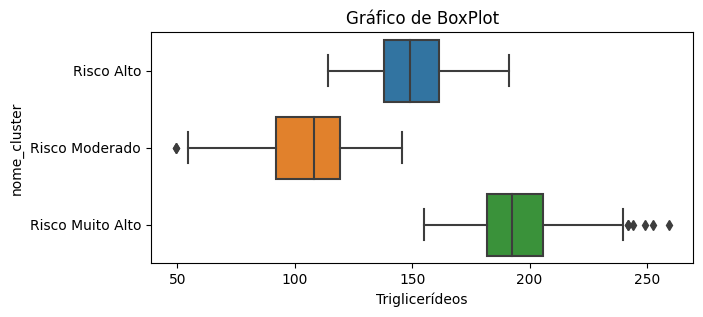

In [75]:
#Gráfico BoxPlot dos Triglicerídeos separados pelos clusters 

plt.figure(figsize=(7,3))
plt.title('Gráfico de BoxPlot')
sns.boxplot(x='Triglicerídeos', y='nome_cluster', data=clusterPacientes, orient='h')

##Outros Dados

In [105]:
#Quantidade de Pessoas em cada cluster separado pelo gênero
clusterPacientes.groupby('nome_cluster')['Gênero'].describe()

,count,unique,top,freq
nome_cluster,,,,
Risco Alto,504,2,F,261
Risco Moderado,266,2,M,141
Risco Muito Alto,220,2,F,118


In [107]:
#Quantidade de Pessoas em cada cluster separado pelo gênero detalhado
clusterPacientes.groupby(['nome_cluster','Gênero'], as_index=False).agg(total=('Gênero','count'))

,nome_cluster,Gênero,total
0,Risco Alto,F,261
1,Risco Alto,M,243
2,Risco Moderado,F,125
3,Risco Moderado,M,141
4,Risco Muito Alto,F,118
5,Risco Muito Alto,M,102


In [80]:
#Quais estados possuem a maior frequência em cada cluster
clusterPacientes.groupby('nome_cluster')['nome'].describe()

,count,unique,top,freq
nome_cluster,,,,
Risco Alto,504,27,Paraíba,28
Risco Moderado,266,27,Amazonas,20
Risco Muito Alto,220,27,Amapá,13


In [110]:
#Quantidade de estados em cada cluster separado pelo gênero detalhado
clusterPacientes.groupby(['nome','nome_cluster'], as_index=False).agg(total=('nome_cluster','count'))

,nome,nome_cluster,total
0,Acre,Risco Alto,22
1,Acre,Risco Moderado,11
2,Acre,Risco Muito Alto,6
3,Alagoas,Risco Alto,21
4,Alagoas,Risco Moderado,7
...,...,...,...
76,São Paulo,Risco Moderado,8
77,São Paulo,Risco Muito Alto,7
78,Tocantins,Risco Alto,14
79,Tocantins,Risco Moderado,15


In [81]:
#Qual grupo possui o maior número de pessoas em cada perfil de consumo de alcool
clusterPacientes.groupby('Consumo de Álcool')['nome_cluster'].describe()

,count,unique,top,freq
Consumo de Álcool,,,,
Alto,103,3,Risco Alto,47
Baixo,590,3,Risco Alto,307
Moderado,297,3,Risco Alto,150


In [111]:
#Quantidade de consumo de alcool em cada cluster separado pelo cluster
clusterPacientes.groupby(['Consumo de Álcool','nome_cluster'], as_index=False).agg(total=('Consumo de Álcool','count'))

,Consumo de Álcool,nome_cluster,total
0,Alto,Risco Alto,47
1,Alto,Risco Moderado,26
2,Alto,Risco Muito Alto,30
3,Baixo,Risco Alto,307
4,Baixo,Risco Moderado,151
5,Baixo,Risco Muito Alto,132
6,Moderado,Risco Alto,150
7,Moderado,Risco Moderado,89
8,Moderado,Risco Muito Alto,58


In [86]:
#Frequência de Regiões em cada triglicerídeos
clusterPacientes.sort_values('Triglicerídeos',inplace=True)
clusterPacientes.groupby('Triglicerídeos')['regiao'].describe()

,count,unique,top,freq
Triglicerídeos,,,,
49.2,1,1,Centro-Oeste,1
49.5,1,1,Centro-Oeste,1
54.4,1,1,Sul,1
54.5,1,1,Centro-Oeste,1
54.6,1,1,Centro-Oeste,1
...,...,...,...,...
242.1,1,1,Sul,1
244.1,1,1,Sudeste,1
249.3,1,1,Centro-Oeste,1


<Axes: title={'center': 'Gráfico de BoxPlot'}, xlabel='Triglicerídeos', ylabel='regiao'>

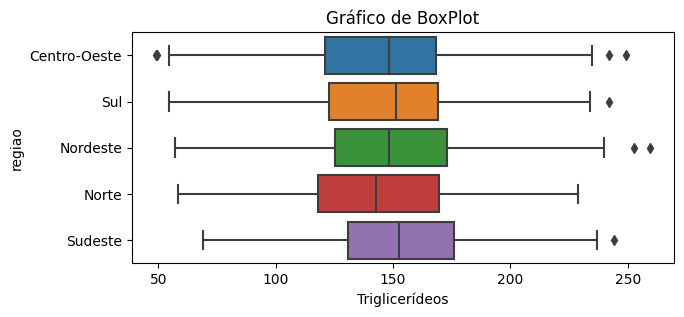

In [94]:
#Gráfico BoxPlot de Triglicerídeos por Região
plt.figure(figsize=(7,3))
plt.title('Gráfico de BoxPlot')
sns.boxplot(x='Triglicerídeos', y='regiao', data=clusterPacientes, orient='h')

In [87]:
#Média do peso por gênero agrupado por cluster
clusterPacientes.groupby(['nome_cluster','Gênero'])['peso'].mean()

nome_cluster      Gênero
Risco Alto        F         151.310728
                  M         152.281070
Risco Moderado    F         130.564000
                  M         134.677305
Risco Muito Alto  F         168.774576
                  M         171.894118
Name: peso, dtype: float64

In [113]:
#Média do peso por gênero agrupado por cluster detalhado
clusterPacientes.groupby(['nome_cluster','Gênero'], as_index=True).agg(total=('peso','mean'))

total
nome_cluster     Gênero            
Risco Alto       F       151.310728
                 M       152.281070
Risco Moderado   F       130.564000
                 M       134.677305
Risco Muito Alto F       168.774576
                 M       171.894118

<Axes: title={'center': 'Gráfico de BoxPlot'}, xlabel='peso', ylabel='nome_cluster'>

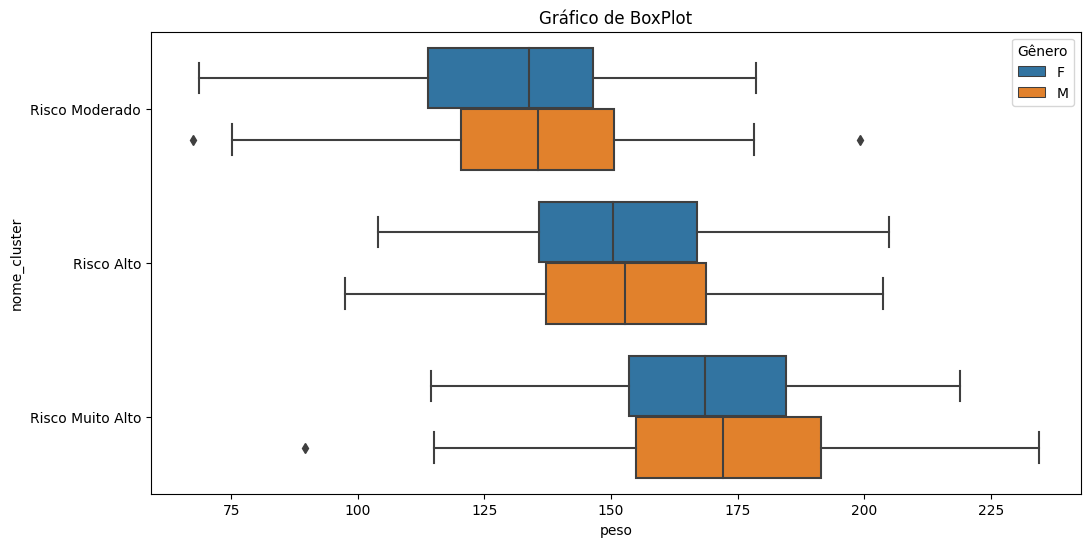

In [104]:
#Gráfico BoxPlot de peso por região e gênero
plt.figure(figsize=(12,6))
plt.title('Gráfico de BoxPlot')
sns.boxplot(x='peso', y='nome_cluster', hue='Gênero', data=clusterPacientes, orient='h')

In [88]:
#Quais estados possuem mais pessoas nos determinados níveis de açucar
clusterPacientes.groupby('Nível de Açúcar')['nome'].describe()

,count,unique,top,freq
Nível de Açúcar,,,,
Alto,210,27,Tocantins,13
Normal,780,27,Minas Gerais,36


In [90]:
#Média da Pressão Sistólica separado por região e cluster
clusterPacientes.groupby(['nome_cluster','regiao'])['Pressão Sistólica'].mean()

nome_cluster      regiao      
Risco Alto        Centro-Oeste    128.753247
                  Nordeste        130.543353
                  Norte           129.806723
                  Sudeste         126.986842
                  Sul             133.627119
Risco Moderado    Centro-Oeste    131.409091
                  Nordeste        127.580247
                  Norte           133.476190
                  Sudeste         119.464286
                  Sul             127.103448
Risco Muito Alto  Centro-Oeste    132.085714
                  Nordeste        130.360000
                  Norte           133.807018
                  Sudeste         130.250000
                  Sul             128.047619
Name: Pressão Sistólica, dtype: float64

<Axes: title={'center': 'Gráfico de BoxPlot'}, xlabel='Pressão Sistólica', ylabel='nome_cluster'>

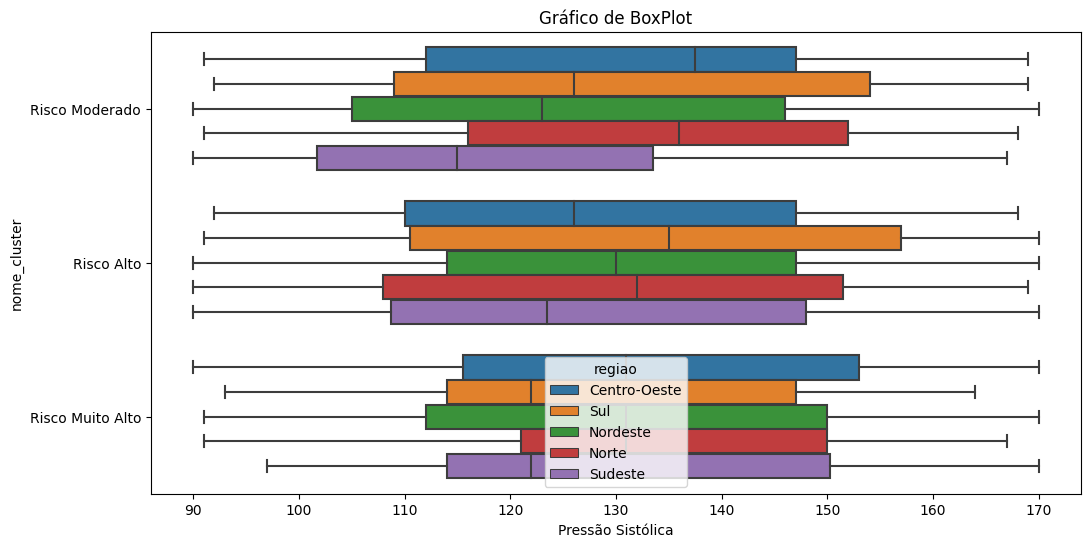

In [103]:
#Gráfico BoxPlot de Pressão Sistólica por região e cluster
plt.figure(figsize=(12,6))
plt.title('Gráfico de BoxPlot')
sns.boxplot(x='Pressão Sistólica', y='nome_cluster', hue='regiao', data=clusterPacientes, orient='h')

## Histograma


<Axes: title={'center': 'Histograma do Peso'}, xlabel='peso', ylabel='Count'>

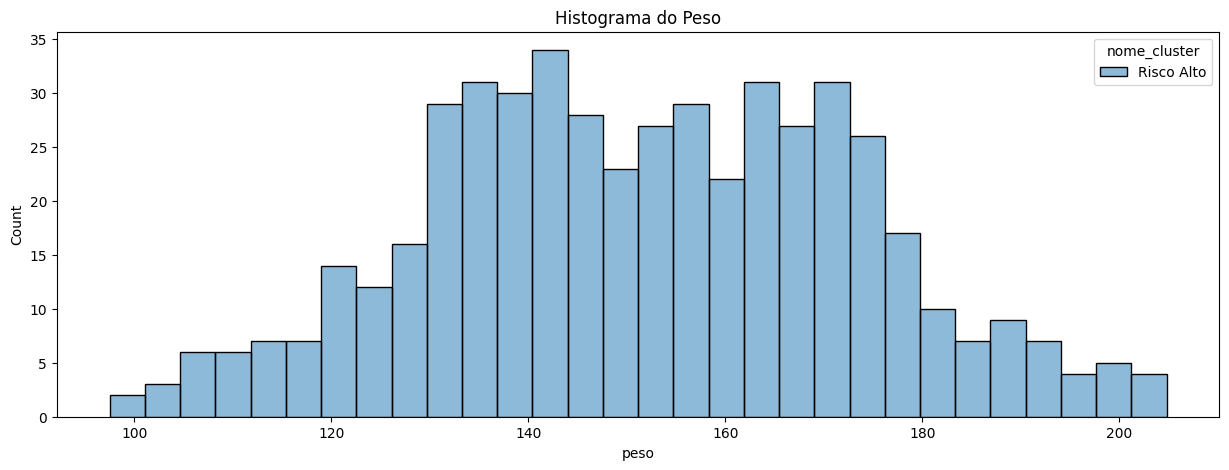

In [129]:
#Criando um histograma da distribuição do peso dos pacientes do grupo de alto risco
tempData = clusterPacientes.query('nome_cluster=="Risco Alto"')

plt.figure(figsize=(15,5))
plt.title('Histograma do Peso')
sns.histplot(data=tempData, x='peso', hue='nome_cluster', bins=30)

In [ ]:
N